Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2022/2023  
http://www.fer.unizg.hr/predmet/map

### Prva laboratorijska vježba - Geometrija uzorka, multivarijatna normalna razdioba, statističko zaključivanje

**Rok za predaju: 2. travnja 2023. u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima, te morate pokazati da razumijete sav kôd koji ste napisali.** Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje.

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. **Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

------------------------------

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import f
from scipy.stats import ttest_rel
from matplotlib.patches import Ellipse
from scipy.stats import t
from scipy.stats import chi2
from statsmodels.multivariate.manova import MANOVA

### 1. Geometrija uzorka i slučajno uzorkovanje

Neka je dan idući uzorak s $n = 4$ opservacije i $p = 3$ varijabli:

$$
\mathbf{X} = 
\begin{bmatrix}
10 & 3 & 2 \\
7 & 2 & 6 \\
8 & 1 & 3 \\ 
7 & 1 & 4  
\end{bmatrix}
$$

#### (a) 

Izračunajte i ispišite uzorački vektor srednjih vrijednosti $\overline{\mathbf{x}}$, uzoračku matricu kovarijance $\mathbf{S}$ i uzoračku matricu korelacije $\mathbf{R}$. 

In [2]:
X = np.array([[10, 3, 2],
                 [7, 2, 6],
                 [8, 1, 3],
                 [7, 1, 4]])

mean_vector = np.mean(X, axis=0)
print("Vektor srednjih vrijednosti:\n", mean_vector)

cov_matrix = np.cov(X, rowvar=False)
print("Uzoračka matrica kovarijance:\n", cov_matrix)

cor_matrix = np.corrcoef(X, rowvar=False)
print("Uzoračka matrica korelacije:\n", cor_matrix)


Vektor srednjih vrijednosti:
 [8.   1.75 3.75]
Uzoračka matrica kovarijance:
 [[ 2.          1.         -2.        ]
 [ 1.          0.91666667 -0.41666667]
 [-2.         -0.41666667  2.91666667]]
Uzoračka matrica korelacije:
 [[ 1.          0.73854895 -0.82807867]
 [ 0.73854895  1.         -0.2548236 ]
 [-0.82807867 -0.2548236   1.        ]]


Vizualizirajte graf raspršenja između prve i druge varijable, zatim prve i treće varijable. Usporedite grafove sa vrijednostima kovarijance i korelacije između tih varijabli.

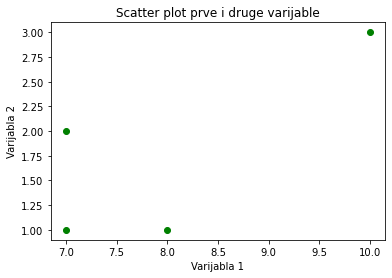

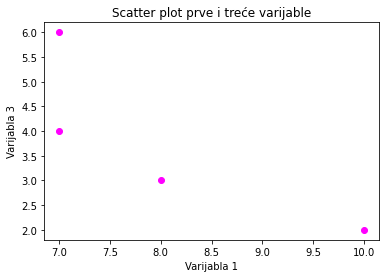

In [3]:
plt.scatter(X[:,0], X[:,1], color='green')
plt.title('Scatter plot prve i druge varijable')
plt.xlabel('Varijabla 1')
plt.ylabel('Varijabla 2')
plt.show()

plt.scatter(X[:,0], X[:,2], color='magenta')
plt.title('Scatter plot prve i treće varijable')
plt.xlabel('Varijabla 1')
plt.ylabel('Varijabla 3')
plt.show()

 Izračunajte statističku udaljenost:
 
 $$
 d\,(\mathbf{x}_1, \mathbf{x}_2) = ((\mathbf{x}_1 - \mathbf{x}_2)^\intercal \, \mathbf{S}^{-1} (\mathbf{x}_1 - \mathbf{x}_2)
 $$
  
 između prve i zadnje opservacije $d\,(\mathbf{x}_1, \mathbf{x}_4)$. Usporedite ju s euklidskom udaljenošću.

In [4]:
S_inv = np.linalg.inv(cov_matrix)

x1 = X[0, :]
x4 = X[3, :]
d_stat = np.dot(np.dot((x1 - x4).T, S_inv), (x1 - x4))

print("Statistička udaljenost između x1 i x4:", d_stat)

d_euc = np.linalg.norm(x1 - x4)

print("Euklidska udaljenost između x1 i x4:", d_euc)

Statistička udaljenost između x1 i x4: 6.000000000000028
Euklidska udaljenost između x1 i x4: 4.123105625617661


#### (b) 
Neka $\mathbf{x}_i \in \mathbb{R}^{n \times 1}$ predstavlja vektor vrijednosti varijable $i$  (iz uzorka $\mathbf{X}$), a $\overline{x}_i$ predstavlja uzoračku srednju vrijednost varijable $i$. Za svaku varijablu $i$, izračunajte vektor devijacija (reziduala) $\mathbf{d}_i = \mathbf{x}_i - \overline{x}_i \mathbf{1}$. Usporedite duljinu vektora devijacija sa standardnom devijacijom varijable.

In [5]:
x_mean = np.mean(X, axis=0)
d = X - x_mean
x_std = np.std(X, axis=0)

for i in range(X.shape[1]):
    print(f"Variable {i+1}: Deviation vector length: {np.linalg.norm(d[:,i])}, Standard deviation: {x_std[i]}")

Variable 1: Deviation vector length: 2.449489742783178, Standard deviation: 1.224744871391589
Variable 2: Deviation vector length: 1.6583123951777, Standard deviation: 0.82915619758885
Variable 3: Deviation vector length: 2.958039891549808, Standard deviation: 1.479019945774904


Generirajte $M = 1000$ realizacija slučajnog vektora dimenzije $4 \times 1$, gdje je svaka varijabla vektora iz diskretne uniformne razdiobe $\mathcal{U}\{0,10\}$. Za svaku varijablu izračunajte standardnu devijaciju i duljinu vektora devijacija. Na grafu prikažite standardnu devijaciju kao funkciju u ovisnosti o duljini vektora devijacija.

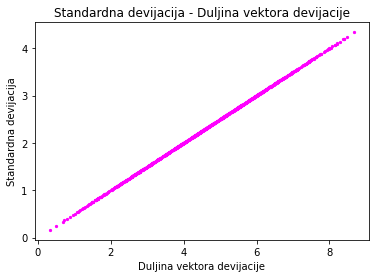

In [6]:
M = 1000
n = 4
a = 0
b = 10

stds = []
d_lengths = []

for i in range(M):
    x = np.random.uniform(a, b, size=(n, 1))
    x_mean = np.mean(x)
    d = x - x_mean*np.ones((n, 1))
    stds.append(np.std(x))
    d_lengths.append(np.linalg.norm(d))

plt.scatter(d_lengths, stds, s=5, color='magenta')
plt.xlabel('Duljina vektora devijacije')
plt.ylabel('Standardna devijacija')
plt.title('Standardna devijacija - Duljina vektora devijacije')
plt.show()

#### (c) 
Preko izračunatih vektora devijacija $\mathbf{d}_i$ rekonstruirajte matricu kovarijance $\mathbf{S}$, a zatim i matricu korelacije $\mathbf{R}$. Dokažite da su rekonstruirane matrice jednake gore izračunatima.

In [7]:
x_mean = np.mean(X, axis=0)
d = X - x_mean
x_std = np.std(X, axis=0)

S_reconstructed = np.dot(d.T, d) / (X.shape[0] - 1)
print("Rekontruirana matrica kovarijance:")
print(S_reconstructed)

R_reconstructed = S_reconstructed / np.sqrt(np.outer(np.diag(S_reconstructed), np.diag(S_reconstructed)))
print("Rekontruirana matrica korelacije:")
print(R_reconstructed)

Rekontruirana matrica kovarijance:
[[ 2.          1.         -2.        ]
 [ 1.          0.91666667 -0.41666667]
 [-2.         -0.41666667  2.91666667]]
Rekontruirana matrica korelacije:
[[ 1.          0.73854895 -0.82807867]
 [ 0.73854895  1.         -0.2548236 ]
 [-0.82807867 -0.2548236   1.        ]]


#### (d) 
Izračunajte uzoračku generaliziranu varijancu $|\mathbf{S}|$ uzorka $\mathbf{X}$. Zatim dodajte novu varijablu koja je linearna kombinacija prve i druge varijable $\mathbf{x}_3 = \mathbf{x}_0 + \mathbf{x}_1$. Izračunajte uzoračku generaliziranu varijancu na novom uzorku.

In [8]:
S = np.cov(X, rowvar=False, ddof=1)
s_generalized = np.linalg.det(S)

print("Uzoračka generalizirana varijanca:")
print(s_generalized)

Uzoračka generalizirana varijanca:
0.08333333333333307


In [9]:
X_new = np.hstack((X, (X[:, 0] + X[:, 1]).reshape(-1, 1)))

S_new = np.cov(X_new, rowvar=False)
s_generalized_new = np.linalg.det(S_new)

print("Uzoračka generalizirana varijanca na novom uzorku:")
print(s_generalized_new)

Uzoračka generalizirana varijanca na novom uzorku:
-4.021988503561052e-17


Maknite zadnju opservaciju iz originalnog uzorka $\mathbf{X}$. Izračunajte uzoračku generaliziranu varijancu i svojstvene vektore na novom uzorku. Što možete zaključiti iz ovog i prethodnog primjera?

In [10]:
X_new = np.delete(X, -1, axis=0)
print("Novi uzorak X bez zadnje opservacije:")
print(X_new)

S_new = np.cov(X_new, rowvar=False, ddof=1)
s_generalized_new = np.linalg.det(S_new)
w, v = np.linalg.eig(X_new)

print("Uzoračka generalizirana varijanca na novom uzorku:")
print(s_generalized_new)

print("Svojstveni vektori na novom uzorku:")
print(v)

Novi uzorak X bez zadnje opservacije:
[[10  3  2]
 [ 7  2  6]
 [ 8  1  3]]
Uzoračka generalizirana varijanca na novom uzorku:
1.4694128267097573e-16
Svojstveni vektori na novom uzorku:
[[ 0.63162067+0.j         -0.23723844-0.14553246j -0.23723844+0.14553246j]
 [ 0.59626722+0.j          0.84213186+0.j          0.84213186-0.j        ]
 [ 0.49550049+0.j          0.03809953+0.46032661j  0.03809953-0.46032661j]]


### 2. Multivarijatna normalna razdioba

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe određene parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 6^2 \\
\end{bmatrix}
$$

In [11]:
mu = np.array([2,3])
sigma = np.array([[10**2, 6**2],[6**2, 6**2]])
X = np.random.multivariate_normal(mu, sigma, size=1000)
print(X[:5])

[[ 7.40443599  8.46132891]
 [12.57490757 14.00470129]
 [ 2.46157966  2.53082473]
 [11.8271586   0.77260792]
 [ 9.60225859  6.77690421]]


#### (a) 

Prikažite graf raspršenja dviju varijabli. Na istom grafu prikažite gustoću razdiobe uz pomoć elipsi za nekoliko različitih veličina $c^2$, gdje su točke $\mathbf{x}$ sve točke koje imaju jednaku udaljenost $c^2$ od središta $\mathbf{\mu}$:

$$
c^2 =(\mathbf{x} - \mathbf{\mu})^\intercal \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu})
$$
Pripazite da osi grafa budu na istoj skali.

**Hint**: Pogledajte `contour` funkciju u R-u, ili `plt.contour` funkciju u Pythonu (`matplotlib` biblioteka)

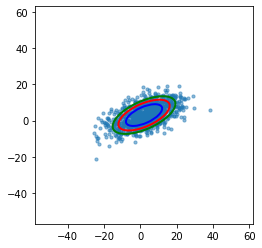

In [12]:
def plot_ellipse(mu, Sigma, ax, c_squared_values, colors):
    eigenvalues, eigenvectors = np.linalg.eigh(Sigma)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    
    for c_squared, color in zip(c_squared_values, colors):
        width, height = 2 * np.sqrt(c_squared * eigenvalues)
        ellipse = Ellipse(mu, width, height, angle, edgecolor=color, facecolor='none', lw=2)
        ax.add_patch(ellipse)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], s=10, alpha=0.5)
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(mu[0] - 60, mu[0] + 60)
ax.set_ylim(mu[1] - 60, mu[1] + 60)

plot_ellipse(mu, sigma, ax, c_squared_values=[1, 2, 3], colors=['blue', 'red', 'green'])

plt.show()

#### (b)

Prikažite tri grafa raspršenja i pripadajućih elipsi uzorkovanjem iz multivarijatne normalne razdiobe s istim $\mu$ iz prošlog podzadatka i različitim matricama kovarijanci:

$$
\mathbf{\Sigma_1} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 10^2 \\
\end{bmatrix},
\mathbf{\Sigma_2} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
\mathbf{\Sigma_3} = 
\begin{bmatrix}
10^2 & 8^2 \\
8^2 & 6^2 \\
\end{bmatrix}
$$
Ukoliko nije moguće prikazati grafove raspršenja, pokažite zašto.

In [13]:
sigma1 = np.array([[10**2, 6**2],
                   [6**2, 10**2]])

sigma2 = np.array([[10**2, 7**2],
                   [7**2, 6**2]])

sigma3 = np.array([[10**2, 8**2],
                   [8**2, 6**2]])

def is_positive_definite(matrix):
    return np.all(np.linalg.eigvals(matrix) > 0)

print("\u03A31 je pozitivno definitna:", is_positive_definite(sigma1))
print("\u03A32 je pozitivno definitna:", is_positive_definite(sigma2))
print("\u03A33 je pozitivno definitna:", is_positive_definite(sigma3))

Σ1 je pozitivno definitna: True
Σ2 je pozitivno definitna: True
Σ3 je pozitivno definitna: False


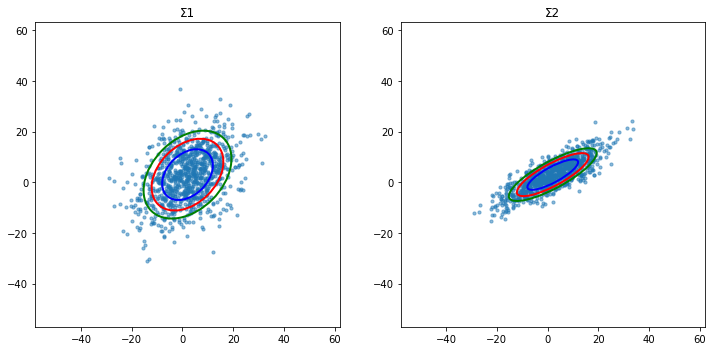

In [14]:
def plot_scatter_and_ellipse(mu, sigma, ax, c_squared_values, colors):
    X = np.random.multivariate_normal(mu, sigma, num_samples)

    ax.scatter(X[:, 0], X[:, 1], s=10, alpha=0.5)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(mu[0] - 60, mu[0] + 60)
    ax.set_ylim(mu[1] - 60, mu[1] + 60)

    plot_ellipse(mu, sigma, ax, c_squared_values, colors)

num_samples = 1000
c_squared_values = [1, 2, 3]
colors = ['blue', 'red', 'green']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plot_scatter_and_ellipse(mu, sigma1, axs[0], c_squared_values, colors)
axs[0].set_title("\u03A31")

plot_scatter_and_ellipse(mu, sigma2, axs[1], c_squared_values, colors)
axs[1].set_title("\u03A32")

plt.show()

#### (c)

Promatramo $\mathbf{\Sigma}_1$ i $\mathbf{\Sigma}_2$ iz prošlog podzadatka. Neka su $\mathbf{X}_1 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_1)}$ i $\mathbf{X}_2 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_2)}$ slučajni dvo-dimenzionalni vektori, i neka je $\mathbf{X}_r$ slučajni vektor određen izrazom $\mathbf{X}_r = \mathbf{X}_1 - \mathbf{X}_2$. Odredite populacijske parametre koji određuju $\mathbf{X}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_r, \mathbf{\Sigma}_r)$.

In [15]:
mu_r = mu - mu
sigma_r = sigma1 + sigma2

print("\u03BCr:")
print(mu_r)
print("\u03A3r:")
print(sigma_r)

μr:
[0 0]
Σr:
[[200  85]
 [ 85 136]]


Procjenite iste te parametre uzorkovanjem $n=10^7$ opservacija iz $\mathbf{X_1}$ i $\mathbf{X_2}$.

In [16]:
n_samples = 10**7

X1_samples = np.random.multivariate_normal(mu, sigma1, n_samples)
X2_samples = np.random.multivariate_normal(mu, sigma2, n_samples)

X_r_samples = X1_samples - X2_samples

mu_r_estimated = np.mean(X_r_samples, axis=0)
sigma_r_estimated = np.cov(X_r_samples, rowvar=False)

print("\u03BCr_estimated:")
print(mu_r_estimated)
print("\u03A3r_estimated:")
print(sigma_r_estimated)

μr_estimated:
[0.00113165 0.0007333 ]
Σr_estimated:
[[200.03688307  85.10187455]
 [ 85.10187455 136.11502139]]


Procjenite parametre procjenitelja $\overline{\mathbf{X}}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_1, (1/n)\mathbf{\Sigma}_1)$ uzorkovanjem iz $\mathbf{X_1}$ i $\mathbf{X_2}$ na sljedeći način: generirajte $K = 10^5$ uzoraka, gdje svaki uzorak ima $n = 100$ opservacija.

In [17]:
K = 10**5
n = 100

X_r_mean_samples = np.zeros((K, 2))

for i in range(K):
    X1_samples = np.random.multivariate_normal(mu, sigma1, n)
    X2_samples = np.random.multivariate_normal(mu, sigma2, n)
    X_r_samples = X1_samples - X2_samples
    X_r_mean = np.mean(X_r_samples, axis=0)
    X_r_mean_samples[i] = X_r_mean

mu_r_estimated_scaled = np.mean(X_r_mean_samples, axis=0)
sigma_r_estimated_scaled = np.cov(X_r_mean_samples, rowvar=False)

print("\u03BCr_estimated:")
print(mu_r_estimated)
print("\u03A3r_estimated_scaled:")
print(sigma_r_estimated_scaled)

μr_estimated:
[0.00113165 0.0007333 ]
Σr_estimated_scaled:
[[2.00022361 0.84931508]
 [0.84931508 1.35331736]]


### 3. Statističko zaključivanje

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe s parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
$$

In [18]:
rng = np.random.RandomState(42)
mu = np.array([2,3])
cov = np.array([[10**2, 7**2],[7**2, 6**2]])
X = rng.multivariate_normal(mu, cov, size=1000)
print(X[:5])

[[ -2.71090527  -0.03398056]
 [ -6.63882852   3.65512228]
 [  4.65936266   3.61991819]
 [-14.7462525   -3.37831362]
 [  5.84898906   6.98264454]]


#### (a)

Implementirajte funkciju za određivanje *Hotellingove $T^2$* statistike.

In [19]:
import numpy as np
from scipy.stats import f

def hotelling_t2(X, mu, sigma, n):
    x_bar = np.mean(X, axis=0)
    t2 = n * (x_bar - mu).T @ np.linalg.inv(sigma) @ (x_bar - mu)
    return t2

Za generirani uzorak testirajte hiptezu $H_0: \mathbf{\mu}= [2, 3]$ naspram $H_1: \mathbf{\mu} \neq [2, 3]$ za razinu značajnosti $\alpha = 0.05$.

In [20]:
n = X.shape[0]
p = X.shape[1]
sigma = np.cov(X, rowvar=False)
t2 = hotelling_t2(X, mu, sigma, n)

alpha = 0.05
F_critical = f.ppf(1 - alpha, p, n - p)

print(t2)
print(F_critical)

if t2 > F_critical:
    print("Hipoteza H0 odbijena, razlike su značajne.")
else:
    print("Hipoteza H0 se ne odbacuje, razlike nisu značajne.")

4.333000124708478
3.0047426924420595
Hipoteza H0 odbijena, razlike su značajne.


#### (b)

Za generirani uzorak, prikažite na grafu $95\%$-tno područje pouzdanosti za $\mathbf{\mu}$ razdiobe.

[1.5882189  2.97656755]


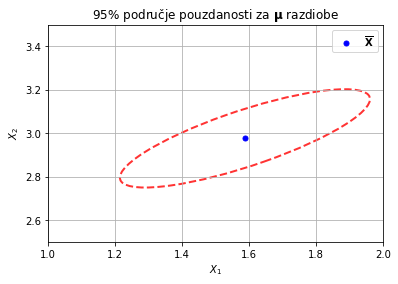

In [21]:
X_bar = np.mean(X, axis=0)
print(X_bar)
S = np.cov(X, rowvar=False)

alpha = 0.05

F_critical = f.ppf(1 - alpha, p, n - p)

eig_vals, eig_vecs = np.linalg.eig(S)

width, height = np.sqrt(eig_vals) * np.sqrt((p * (n - 1) * F_critical) / (n * (n - p)))
angle = np.degrees(np.arctan2(eig_vecs[1, 0], eig_vecs[0, 0]))

confidence_ellipse = Ellipse(xy=X_bar, width=width, height=height, angle=angle, edgecolor='r', facecolor='none', linestyle='--', linewidth=2, alpha=0.8)
plt.gca().add_patch(confidence_ellipse)

plt.plot(X_bar[0], X_bar[1], 'bo', markersize=5, label='$\mathbf{\overline{X}}$')

plt.title('95% područje pouzdanosti za $\mathbf{\mu}$ razdiobe')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)

plt.xlim(1, 2)
plt.ylim(2.5, 3.5)

plt.legend()
plt.show()

#### (c)

Uz pomoć simultanih intervala pouzdanosti ($T^2$-interval), odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli, $\mu_1$ i $\mu_2$, te njihovu razliku $\mu_2 - \mu_1$.

In [22]:
n, p = X.shape
x_bar = X.mean(axis=0)
S = np.cov(X, rowvar=False)
mu = np.array([2, 3])
T2 = n * (x_bar - mu).T @ np.linalg.inv(S) @ (x_bar - mu)
alpha = 0.05

df1, df2 = p, n - p
F = stats.f.ppf(q=1 - alpha, dfn=df1, dfd=df2)
T2_U = ((n - 1) * p / (n - p)) * F

CI_mu1 = [x_bar[0] - np.sqrt(T2_U / n) * np.sqrt(S[0, 0]),
         x_bar[0] + np.sqrt(T2_U / n) * np.sqrt(S[0, 0])]

CI_mu2 = [x_bar[1] - np.sqrt(T2_U / n) * np.sqrt(S[1, 1]),
         x_bar[1] + np.sqrt(T2_U / n) * np.sqrt(S[1, 1])]

CI_diff = [(x_bar[1] - x_bar[0]) - np.sqrt(T2_U / n) * np.sqrt(S[0, 0] + S[1, 1] - 2 * S[0, 1]),
           (x_bar[1] - x_bar[0]) + np.sqrt(T2_U / n) * np.sqrt(S[0, 0] + S[1, 1] - 2 * S[0, 1])]

print(f"95% CI za μ_1: {CI_mu1}")
print(f"95% CI za μ_2: {CI_mu2}")
print(f"95% CI za μ_2 - μ_1: {CI_diff}")

95% CI za μ_1: [0.841195014004429, 2.3352427847637016]
95% CI za μ_2: [2.5243982956301947, 3.4287367978430163]
95% CI za μ_2 - μ_1: [0.9161281635950091, 1.8605691311100712]


Izračunajte univarijatni $t$-interval pouzdanosti za srednju vrijednost svake varijable, a zatim i Bonferronijevu korekciju $t$-intervala. Usporedite s rezultatima dobivenim pomoću $T^2$-intervala.

In [23]:
def ci_t(mu, se, t_crit):
    return mu - t_crit * se, mu + t_crit * se

se_mu1 = np.sqrt(S[0, 0] / n)
se_mu2 = np.sqrt(S[1, 1] / n)

nu = n - 1
alpha = 0.05

t_critical = t.ppf(1 - alpha / 2, nu)
t_critical_bonferroni = t.ppf(1 - alpha / (2 * p), nu)

CI_mu1_t = ci_t(X_bar[0], se_mu1, t_critical)
CI_mu2_t = ci_t(X_bar[1], se_mu2, t_critical)

CI_mu1_t_bonferroni = ci_t(X_bar[0], se_mu1, t_critical_bonferroni)
CI_mu2_t_bonferroni = ci_t(X_bar[1], se_mu2, t_critical_bonferroni)

print(f"Univarijatni 95% CI za μ_1: {CI_mu1_t}")
print(f"Univarijatni 95% CI za μ_2: {CI_mu2_t}")
print(f"Bonferronijev 95% CI za μ_1: {CI_mu1_t_bonferroni}")
print(f"Bonferronijev 95% CI za μ_2: {CI_mu2_t_bonferroni}")
print(f"95% T^2 CI za μ_1: {CI_mu1}")
print(f"95% T^2 CI za μ_2: {CI_mu2}")


Univarijatni 95% CI za μ_1: (0.9905330785913337, 2.185904720176797)
Univarijatni 95% CI za μ_2: (2.61479176516648, 3.338343328306731)
Bonferronijev 95% CI za μ_1: (0.9045065636134431, 2.2719312351546876)
Bonferronijev 95% CI za μ_2: (2.562720411607177, 3.390414681866034)
95% T^2 CI za μ_1: [0.841195014004429, 2.3352427847637016]
95% T^2 CI za μ_2: [2.5243982956301947, 3.4287367978430163]


Izračunajte $\tilde{\chi}^2$ interval pouzdanosti za velike uzorke za srednju vrijednost svake varijable. Usporedite dobivenu vrijednost s prethodno dobivenim vrijednostima.

In [24]:
from scipy.stats import chi2

chi = chi2.ppf(1 - alpha, df1)

CI_x1 = [X_bar[0] - np.sqrt(chi) * np.sqrt(S[0,0] / n),
         X_bar[0] + np.sqrt(chi) * np.sqrt(S[0,0] / n)]

CI_x2 = [X_bar[1] - np.sqrt(chi) * np.sqrt(S[1,1] / n),
         X_bar[1] + np.sqrt(chi) * np.sqrt(S[1,1] / n)]

print(f"Univarijatni 95% CI za μ_1: {CI_x1}")
print(f"Univarijatni 95% CI za μ_2: {CI_x2}")

Univarijatni 95% CI za μ_1: [0.8426893355622564, 2.3337484632058745]
Univarijatni 95% CI za μ_2: [2.5253027998541415, 3.4278322936190695]


U idućem zadatku ćete provesti ostatak naučenih metoda vezano uz statističko zaključivanje o više vektora sredine.

### 4. Primjena implementiranih metoda

Učitajte podatkovni skup [*iris*](https://archive.ics.uci.edu/ml/datasets/Iris) (postoji mogućnost i učitavanja unutar jezika - [Python](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) / [R](https://technicaljockey.com/r-programming-training/loading-iris-data-set-in-r/)).

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Procijenite parametre $\mathbf{\mu},\mathbf{\Sigma}$ vezane uz 4 numeričke varijable.

In [26]:
mu = np.mean(iris_df, axis=0)
sigma = np.std(iris_df, axis=0)
print("\u03BC:" + str(mu))
print("\u03A3:" + str(sigma))

μ:sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
Σ:sepal length (cm)    0.825301
sepal width (cm)     0.434411
petal length (cm)    1.759404
petal width (cm)     0.759693
dtype: float64


Provedite analizu normalnosti 4 numeričkih varijabli. Ukoliko je potrebno, predložite koje transformacije biste radili na podatcima kako biste ojačali pretpostavke normalnosti u skupu. 

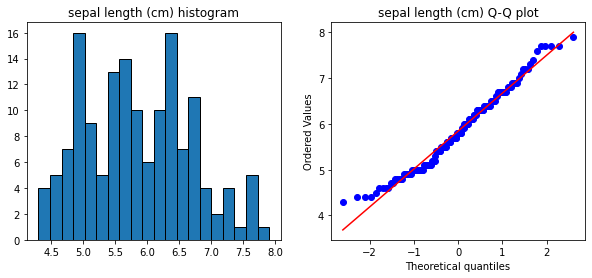

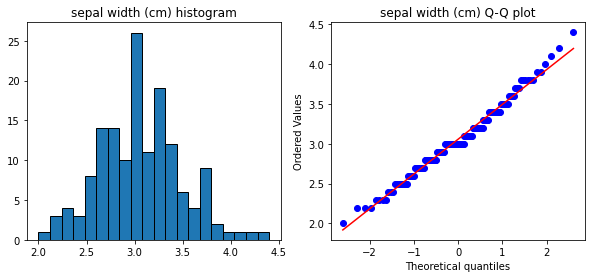

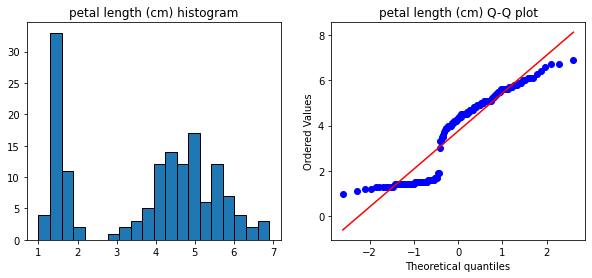

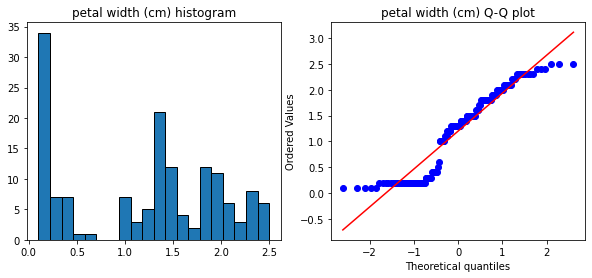

In [27]:
for col in iris_df.columns:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(iris_df[col], bins=20, edgecolor='black')
    plt.title(col + ' histogram')
    
    plt.subplot(1, 2, 2)
    stats.probplot(iris_df[col], dist='norm', plot=plt)
    plt.title(col + ' Q-Q plot')
    
    plt.show()

Provedite detekciju stršećih vrijednosti (vizualno/numerički).

**Hint**: Poglavlje 4.7 (Johnson)

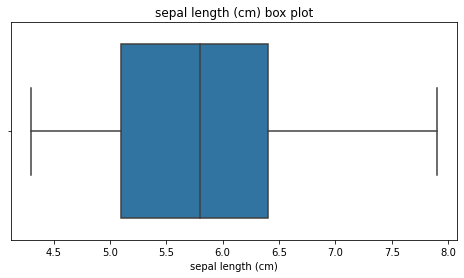

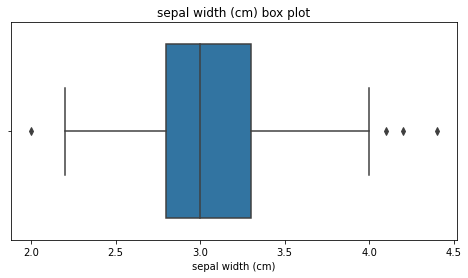

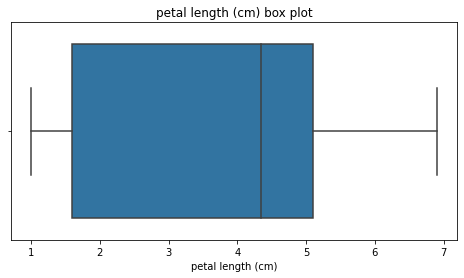

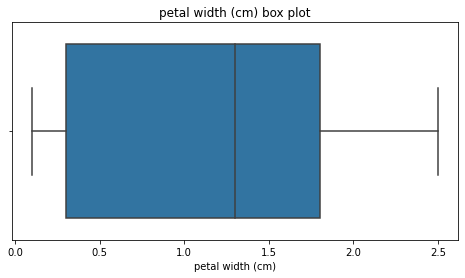

In [28]:
for col in iris_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=iris_df[col])
    plt.title(col + ' box plot')
    plt.show()

Odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli.

**Hint**: Prethodno implementirani $T^2$-interval/ $t$-interval/ Bonferroni

In [29]:
sem = iris_df.sem()
n = len(iris_df)
num_variables = len(iris_df.columns)
alpha = 0.05
bonferroni_alpha = alpha / num_variables

df = n - 1

t_critical = t.ppf(1 - bonferroni_alpha / 2, df)

confidence_intervals = []
for i in range(num_variables):
    lower_bound = mu[i] - t_critical * sem[i]
    upper_bound = mu[i] + t_critical * sem[i]
    confidence_intervals.append((lower_bound, upper_bound))

for i, interval in enumerate(confidence_intervals):
    print(f"95%-tno područje pouzdanosti za {iris_df.columns[i]}: {interval}")

95%-tno područje pouzdanosti za sepal length (cm): (5.672385408214408, 6.014281258452261)
95%-tno područje pouzdanosti za sepal width (cm): (2.967352069130223, 3.1473145975364454)
95%-tno područje pouzdanosti za petal length (cm): (3.3935676678519116, 4.122432332148094)
95%-tno područje pouzdanosti za petal width (cm): (1.0419751906032866, 1.3566914760633815)


Razmatramo *species: virginica* populaciju. Razlikuju li se  *sepal* __length__ i __width__ varijable od *petal* __length__ i __width__ varijabli (duljina i širina sepala i papučica - dijelovi reproduktivnog sustava cvijeta)?

**Hint**: Metoda uparenih usporedbi

In [30]:
iris_df.columns = [col.replace(' ', '_').replace('_(cm)', '') for col in iris_df.columns]

iris_df['species'] = iris.target

virginica_df = iris_df[iris_df['species'] == 2]

t_test1 = ttest_rel(virginica_df['sepal_length'], virginica_df['petal_length'])
t_test2 = ttest_rel(virginica_df['sepal_width'], virginica_df['petal_width'])

alfa = 0.05

if t_test1.pvalue < alfa:
    print("Postoji statistički značajna razlika između sepal_length i petal_length (p-vrijednost =", t_test1.pvalue, ").")
else:
    print("Nema statistički značajne razlike između sepal_length i petal_length (p-vrijednost =", t_test1.pvalue, ").")

if t_test2.pvalue < alfa:
    print("\nPostoji statistički značajna razlika između sepal_width i petal_width (p-vrijednost =", t_test2.pvalue, ").")
else:
    print("\nNema statistički značajne razlike između sepal_width i petal_width (p-vrijednost =", t_test2.pvalue, ").")

Postoji statistički značajna razlika između sepal_length i petal_length (p-vrijednost = 7.985259485031611e-28 ).

Postoji statistički značajna razlika između sepal_width i petal_width (p-vrijednost = 5.339057365526556e-28 ).


Usporedite vektore srednjih vrijednosti za sve varijable između svih *species* populacija. Postoji li statistički značajna razlika?

**Hint**: MANOVA

In [31]:
iris_df.columns = [col.replace(' ', '_').replace('_(cm)', '') for col in iris_df.columns]

iris_df['species'] = iris.target

manova = MANOVA.from_formula('sepal_length + sepal_width + petal_length + petal_width ~ species', data=iris_df)
result = manova.mv_test()

print("MANOVA rezultati:\n", result.summary())

MANOVA rezultati:
                    Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0190 4.0000 145.0000 1875.7577 0.0000
         Pillai's trace  0.9810 4.0000 145.0000 1875.7577 0.0000
 Hotelling-Lawley trace 51.7450 4.0000 145.0000 1875.7577 0.0000
    Roy's greatest root 51.7450 4.0000 145.0000 1875.7577 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
         species          Value  Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
           Wilks' lambda  0.0696 4.0000 145.0000 484.5379 0.0000
          Pillai's trace  

**Bonus**: Postoji li dodatno istraživačko pitanje koje želite testirati?

Ne hvala.